<a href="https://colab.research.google.com/github/SamaraMoreira/IA/blob/main/material/aulas/IA/lab03/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


  

## Começando

Sabemos que dentro de aprendizado supervisionado vamos trabalhar com dois tipos de problemas:

- [x]  Classificação - (Já conhecemos o KNN)
- [ ]  Regressão - (Objetivo de hoje)

### Uma intuição sobre problemas que envolvem cada um deles:

        Classificação --> Resultados discretos (categóricos).
        Regressão --> Resultados numéricos e contínuos.


### Regressão linear

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

![reta](/aulas/lab03/reta.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/reta.png?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

![plano](/aulas/lab03/plano.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/plano.png?raw=1" width="450">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.


## Bora lá!!

Vamos juntos realizar um projeto, do começo ao fim, usando regressão.



## Definição do problema

Vamos trabalhar com um dataset com informações coletadas U.S Census Service (tipo IBGE americano) sobre habitação na área de Boston Mass.

ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

informação importante sobre o significado de cada um dos atributos

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


    Queremos desenvolver um modelo capaz de predizer o valor de um imovel em Boston.


### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado, não-supervisionado ou aprendizado por reforço?

R: Supervisionado, pelos dados serem rotulados.

    Classificação, regressão ou clusterização?

R:Regressão, pela resposta ser númerica


In [1]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


O scikit-learn possui diversos dataset em seu banco de dados, um deles é o dataset que vamos utilizar hoje.

faça o import direto usando ***sklearn.datasets***

caso queira, você pode fazer o downlod do dataset direto do site e importar em seu projeto.



In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

#para conhecer o que foi importado do dataset
boston_dataset.keys()


In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
# vamos carregar no pandas apenas data com os dados e "feature_names" com os nomes dos atributos

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
#vamos adicionar mais uma coluna ao nosso dataframe com o target (alvo que vamos fazer a predição)
df['MEDV'] = housing.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Desafio 2

Use os metodos info() e describe() para exibir as informações do dataframe e responda:

Existe dados faltantes?

Qual o tamanho do dataset, quantas linhas e quantas colunas?



In [ ]:
"""
O DataSet possui 20640 linhas e 9 colunas
"""

In [9]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.shape

(20640, 9)

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Desafio 3

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


In [ ]:
## Sua resposta e seus gráficos para análisar..
"""
'MedInc': Renda média das pessoas na área (em milhares de dólares)
'HouseAge': Idade média das casas na área (em anos)
'AveRooms': Número médio de quartos por habitação
'AveBedrms': Número médio de quartos por dormitório
'Population': População na área
'AveOccup': Média da ocupação das habitações
'MEDV': Valor médio das casas ocupadas pelos proprietários (em milhares de dólares)""

No conjunto de dados do Boston House-Price, as colunas correspondentes são:

CRIM: per capita crime rate by town (taxa de crimes per capita por cidade)
ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terrenos residenciais zonados para lotes com mais de 25.000 pés quadrados)
INDUS: proportion of non-retail business acres per town (proporção de acres de negócios não varejistas por cidade)
CHAS: Charles River dummy variable (variável dummy do Rio Charles) (indicador de se o terreno faz fronteira com o rio Charles, 1 se faz fronteira, 0 caso contrário)
NOX: nitric oxides concentration (concentração de óxidos nítricos)
RM: average number of rooms per dwelling (número médio de quartos por habitação)
AGE: proportion of owner-occupied units built prior to 1940 (proporção de unidades ocupadas pelo proprietário construídas antes de 1940)
DIS: weighted distances to five Boston employment centres (distâncias ponderadas para cinco centros de emprego em Boston)
RAD: index of accessibility to radial highways (índice de acessibilidade às rodovias radiais)
TAX: full-value property-tax rate per $10,000 (taxa de imposto sobre propriedade de valor total por $10.000)
PTRATIO: pupil-teacher ratio by town (razão aluno-professor por cidade)
B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 vezes (Bk - 0.63)^2, onde Bk é a proporção de pessoas negras por cidade)
LSTAT: % lower status of the population (% de status mais baixo da população)
MEDV: Median value of owner-occupied homes in $1000's (valor mediano das casas ocupadas pelo proprietário em milhares de dólares)

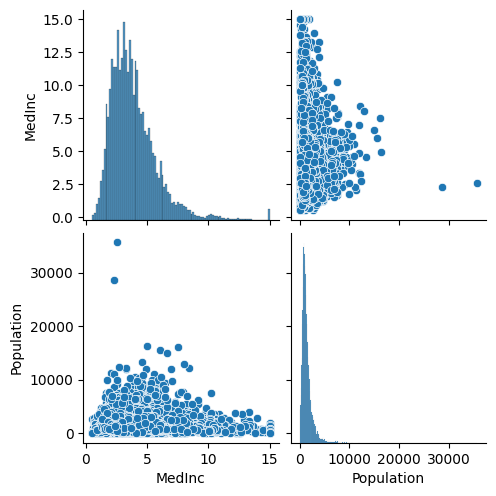

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão
sns.pairplot(df[['MedInc', 'Population']])
plt.show()


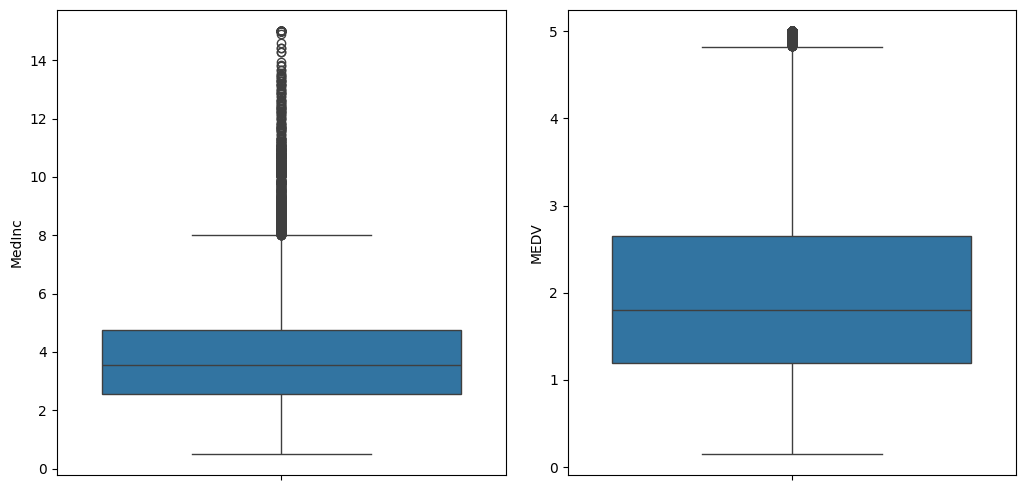

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.boxplot(y='MedInc', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(y='MEDV', data=df)
plt.tight_layout()
plt.show()

<Axes: >

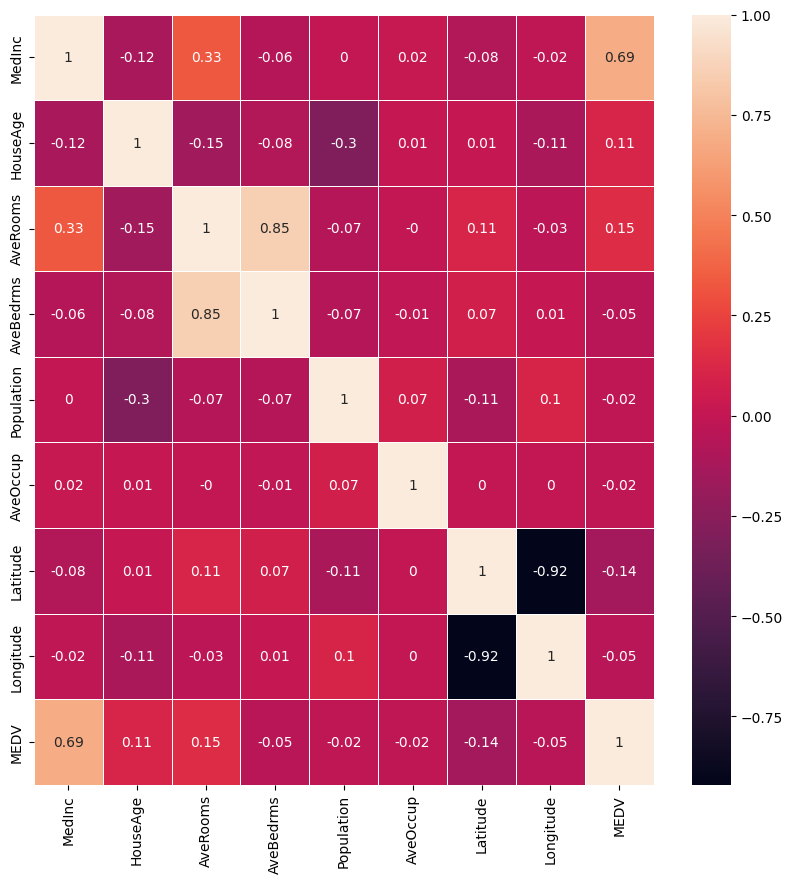

In [22]:
#Vamos explorar um pouco uma matrix de correlação

import seaborn as sns
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Desafio 4

Analisando a matriz de correlação acima responda:

Qual feature possue a maior correlação ***positiva*** com o target?
'AveRooms': Número médio de quartos por habitação com a
'AveBedrms': Número médio de quartos por dormitório, está em 0.85. Mas seria interessante analisar que a 'MEDV': Valor médio das casas ocupadas pelos proprietários (em milhares de dólares)"" com a 'MedInc': Renda média das pessoas na área (em milhares de dólares), está 0.69.


Qual feature possue a maior correlação ***negativa*** com o target?
A latitue e a logitude, possui a correlação mais negativa, em 0.92.


<Axes: xlabel='MedInc', ylabel='MEDV'>

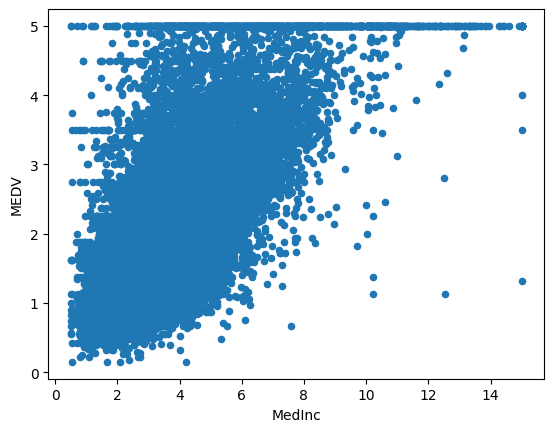

In [23]:
df.plot.scatter('AveRooms', 'MEDV')

<Axes: xlabel='MedInc', ylabel='MEDV'>

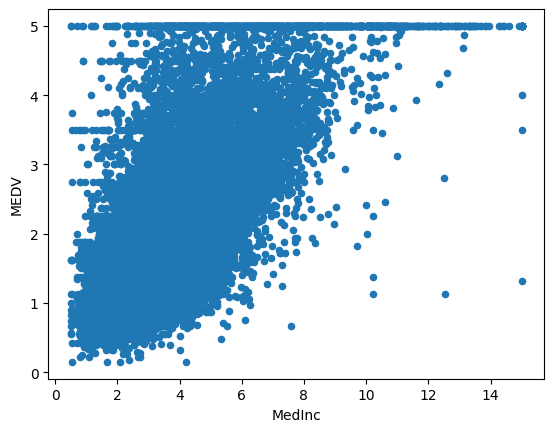

In [25]:
df.plot.scatter('MedInc', 'MEDV')

## PARE!!!

A análise feita no desafio 2 e 3 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [26]:
# Vamos treinar nosso modelo com 2 dois atributos independentes
# para predizer o valor de saida
X = df[['MedInc', 'AveRooms']]   ### teste com duas entradas
# O professor tinha feito com RM, RM: average number of rooms per dwelling (número médio de quartos por habitação)
#X = df[['RM']]            ### teste com uma entrada
#X = df.drop(['MEDV'], axis=1)     ### teste com todas as entradas
"""
'MedInc': Renda média das pessoas na área (em milhares de dólares)
'HouseAge': Idade média das casas na área (em anos)
'AveRooms': Número médio de quartos por habitação
'AveBedrms': Número médio de quartos por dormitório
'Population': População na área
'AveOccup': Média da ocupação das habitações
'MEDV': Valor médio das casas ocupadas pelos proprietários (em milhares de dólares)"""
Y = df['MEDV']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (20640, 2) e saidas (20640,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***


***scikit-learn*** Caso ainda não tenha instalado, no terminal digite:
- pip install scikit-learn



In [27]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [28]:
#Primeiras linhas do dataframe
X_treino.head()

,MedInc,AveRooms
13595,1.1806,4.396970
7289,2.5352,3.717300
17040,5.6271,6.262780
18831,1.9650,6.058608
8909,1.3333,3.316176


In [29]:
Y_treino.head()

13595    0.683
7289     1.844
17040    3.748
18831    0.654
8909     3.100
Name: MEDV, dtype: float64

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o regressor, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [30]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)




LinearRegression()

Pronto!! bora testar se esta funcionando....


In [31]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [1.22495991 1.69437468 3.12376691 ... 0.90795757 4.80663356 2.74964494]


In [35]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1: ##O Professsor tinha feito com o lstat
    print('Nossa equação é: Y_pred = {} + {} * X_MedInc + {} * X_AveRooms'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_MedInc'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  0.602634879215973
(B) Inclinação:  [ 0.44029051 -0.04348321]
Nossa equação é: Y_pred = 0.6 + 0.44 * X_MedInc + -0.04 * X_AveRooms


Text(0, 0.5, 'Valor Predito')

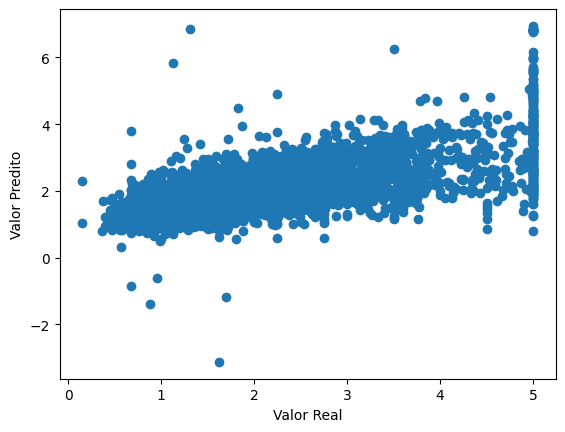

In [33]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

## Avaliando o modelo treinado

Vamos colocar alguns valores e ver a predição do classificador.

In [34]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 2892 
Erro Quadrático Médio (MSE): 0.70
Erro Médio Absoluto (MAE): 0.62
Raiz do Erro Quadrático Médio (RMSE): 0.84 
R2-score: -0.03


### Desafio 5

Refaça o notebook substituindo o algoritmo de regressão linear por outro algoritmo de regressão e compare os resultados obtidos.

Sugestão de alguns algoritmos de ML para problemas de regressão:

| Nome | Vantagem | Desvantagem | Exemplo sklearn |
|:---:|:---:|:---:|:---:|
| Regressão Linear | Fácil de entender e implementar | Pode não ser adequado para problemas mais complexos | from sklearn.linear_model import LinearRegression<br><br><br>model = LinearRegression()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Árvores de decisão | Fácil de entender e visualizar | Pode levar a overfitting se a árvore for muito grande | from sklearn.tree import DecisionTreeRegressor<br><br><br>model = DecisionTreeRegressor()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Random Forest | Mais robusto e geralmente mais preciso do que uma única árvore de decisão | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import RandomForestRegressor<br><br><br>model = RandomForestRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Support Vector Regression (SVR) | Lida bem com dados multidimensionais e não lineares | Pode ser difícil de escolher o kernel correto e ajustar os hiperparâmetros | from sklearn.svm import SVR<br><br><br>model = SVR(kernel='rbf')<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Gradient Boosting | Preciso e lida bem com dados multidimensionais e não lineares | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import GradientBoostingRegressor<br><br><br>model = GradientBoostingRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
|  |  |  |  |




In [ ]:
## implemente sua sua solução....

"""RandomForestRegressor seria uma das melhores opções, visto que RMSE, o  MSE E MAE são um dos menores também.
Soma dos Erros ao Quadrado (SSE): 2036.01
Erro Quadrático Médio (MSE): 0.10
Erro Médio Absoluto (MAE): 0.23
Raiz do Erro Quadrático Médio (RMSE): 0.31
R2-score: 0.90"""

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)
prediction = model.predict(X)
# Calcular as métricas de avaliação
sse = np.sum((prediction - Y)**2)
mse = mean_squared_error(Y, prediction)
mae = mean_absolute_error(Y, prediction)
rmse = np.sqrt(mean_squared_error(Y, prediction))
r2 = r2_score(prediction, Y)

# Exibir as métricas de avaliação
print("Soma dos Erros ao Quadrado (SSE): %.2f" % sse)
print("Erro Quadrático Médio (MSE): %.2f" % mse)
print("Erro Médio Absoluto (MAE): %.2f" % mae)
print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)

Soma dos Erros ao Quadrado (SSE): 14307.45
Erro Quadrático Médio (MSE): 0.69
Erro Médio Absoluto (MAE): 0.62
Raiz do Erro Quadrático Médio (RMSE): 0.83
R2-score: -0.09


In [48]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X, Y)
prediction = model.predict(X)


# Calcular as previsões usando o modelo de árvore de decisão
prediction = model.predict(X)

# Calcular as métricas de avaliação
sse = np.sum((prediction - Y)**2)
mse = mean_squared_error(Y, prediction)
mae = mean_absolute_error(Y, prediction)
rmse = np.sqrt(mean_squared_error(Y, prediction))
r2 = r2_score(prediction, Y)

# Exibir as métricas de avaliação
print("Soma dos Erros ao Quadrado (SSE): %.2f" % sse)
print("Erro Quadrático Médio (MSE): %.2f" % mse)
print("Erro Médio Absoluto (MAE): %.2f" % mae)
print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)


Soma dos Erros ao Quadrado (SSE): 5.54
Erro Quadrático Médio (MSE): 0.00
Erro Médio Absoluto (MAE): 0.00
Raiz do Erro Quadrático Médio (RMSE): 0.02
R2-score: 1.00


In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X, Y)
prediction = model.predict(X)
# Calcular as métricas de avaliação
sse = np.sum((prediction - Y)**2)
mse = mean_squared_error(Y, prediction)
mae = mean_absolute_error(Y, prediction)
rmse = np.sqrt(mean_squared_error(Y, prediction))
r2 = r2_score(prediction, Y)

# Exibir as métricas de avaliação
print("Soma dos Erros ao Quadrado (SSE): %.2f" % sse)
print("Erro Quadrático Médio (MSE): %.2f" % mse)
print("Erro Médio Absoluto (MAE): %.2f" % mae)
print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)

Soma dos Erros ao Quadrado (SSE): 2036.01
Erro Quadrático Médio (MSE): 0.10
Erro Médio Absoluto (MAE): 0.23
Raiz do Erro Quadrático Médio (RMSE): 0.31
R2-score: 0.90


In [50]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X, Y)
prediction = model.predict(X)
# Calcular as métricas de avaliação
sse = np.sum((prediction - Y)**2)
mse = mean_squared_error(Y, prediction)
mae = mean_absolute_error(Y, prediction)
rmse = np.sqrt(mean_squared_error(Y, prediction))
r2 = r2_score(prediction, Y)

# Exibir as métricas de avaliação
print("Soma dos Erros ao Quadrado (SSE): %.2f" % sse)
print("Erro Quadrático Médio (MSE): %.2f" % mse)
print("Erro Médio Absoluto (MAE): %.2f" % mae)
print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)

Soma dos Erros ao Quadrado (SSE): 12868.90
Erro Quadrático Médio (MSE): 0.62
Erro Médio Absoluto (MAE): 0.55
Raiz do Erro Quadrático Médio (RMSE): 0.79
R2-score: 0.19


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X, Y)
prediction = model.predict(X)
# Calcular as métricas de avaliação
sse = np.sum((prediction - Y)**2)
mse = mean_squared_error(Y, prediction)
mae = mean_absolute_error(Y, prediction)
rmse = np.sqrt(mean_squared_error(Y, prediction))
r2 = r2_score(prediction, Y)

# Exibir as métricas de avaliação
print("Soma dos Erros ao Quadrado (SSE): %.2f" % sse)
print("Erro Quadrático Médio (MSE): %.2f" % mse)
print("Erro Médio Absoluto (MAE): %.2f" % mae)
print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)

Soma dos Erros ao Quadrado (SSE): 11963.51
Erro Quadrático Médio (MSE): 0.58
Erro Médio Absoluto (MAE): 0.56
Raiz do Erro Quadrático Médio (RMSE): 0.76
R2-score: 0.20


## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



Soma dos Erros ao Quadrado (SSE): 602124 
Erro Quadrático Médio (MSE): 20070.81
Erro Médio Absoluto (MAE): 104.66
Raiz do Erro Quadrático Médio (RMSE): 141.67 
R2-score: 0.55


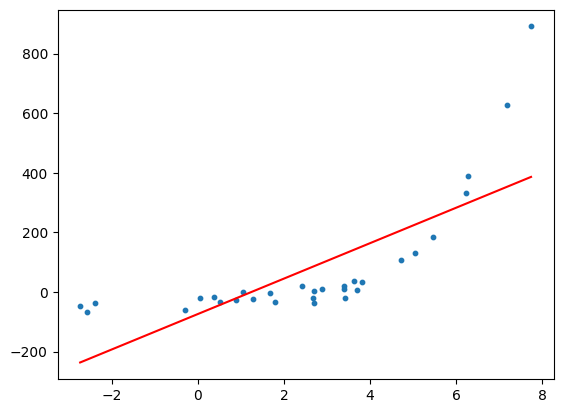

In [53]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

### Desafio 6

Faça uma função que calcula a regressão polinomial (basicamente colocar o codigo acima em uma função), agora faça um código que chama essa função alterando o grau do polinomio de 2 até 10, basicamente um loop for que chama a função criada.

Análise os resultados obtidos e determine qual o melhor grau polinomio do seu modelo.

Grau Polinomial 2:
SSE: 1248255.594041272
MSE: 41608.51980137573
MAE: 138.9180268220175
RMSE: 203.98166535592293
R2-score: 0.07416629378900763

Grau Polinomial 3:
SSE: 1195418.3767629354
MSE: 39847.27922543118
MAE: 128.38510914623808
RMSE: 199.6178329344129
R2-score: 0.11335576502566569

Grau Polinomial 4:
SSE: 1138290.0397436772
MSE: 37943.00132478924
MAE: 129.67485985217024
RMSE: 194.78963351469514
R2-score: 0.15572796847878445

Grau Polinomial 5:
SSE: 1138079.8268965809
MSE: 37935.994229886026
MAE: 130.2138417238515
RMSE: 194.77164637052803
R2-score: 0.15588388377389661

Grau Polinomial 6:
SSE: 1105703.3861240547
MSE: 36856.77953746849
MAE: 127.4777907842875
RMSE: 191.9811957913287
R2-score: 0.17989755557111475

Grau Polinomial 7:
SSE: 1105407.282789563
MSE: 36846.909426318765
MAE: 128.0993594201622
RMSE: 191.95548813805445
R2-score: 0.18011717601495847

Grau Polinomial 8:
SSE: 1060391.0747953167
MSE: 35346.36915984389
MAE: 125.64873303649652
RMSE: 188.00630085144456
R2-score: 0.213

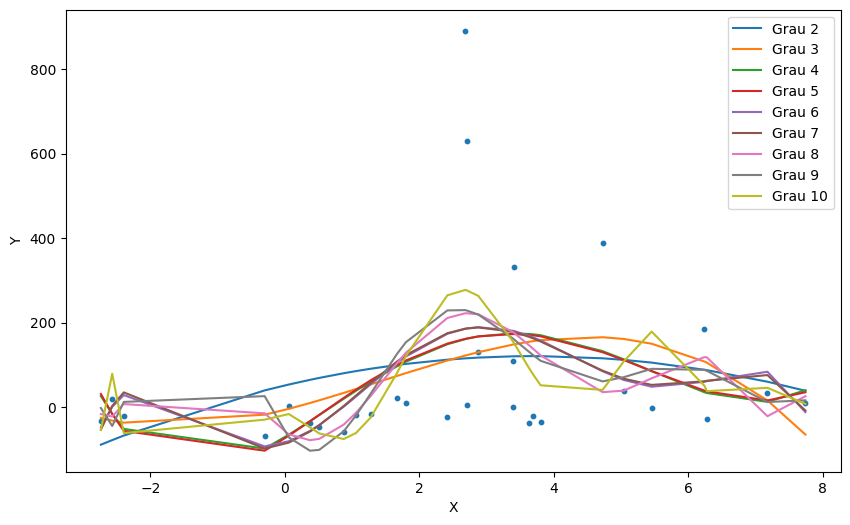

In [56]:
## Implemente sua solução
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

def regressao_polinomial(x, y, grau_poly):
    # Aplica feature polinomial
    polynomial_features = PolynomialFeatures(degree=grau_poly)
    x_poly = polynomial_features.fit_transform(x)

    # Aplica modelo de regressão linear
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    # Métricas de avaliação do modelo
    sse = np.sum((y_poly_pred - y)**2)
    mse = mean_squared_error(y, y_poly_pred)
    mae = mean_absolute_error(y, y_poly_pred)
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)

    return sse, mse, mae, rmse, r2, y_poly_pred

# Agora vamos criar um código para testar diferentes graus polinomiais e analisar os resultados
graus = list(range(2, 11))
resultados = {}

for grau in graus:
    sse, mse, mae, rmse, r2, _ = regressao_polinomial(x, y, grau)
    resultados[grau] = {'SSE': sse, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2-score': r2}

# Imprime os resultados para cada grau polinomial testado
for grau, metricas in resultados.items():
    print(f"Grau Polinomial {grau}:")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print()

# Plotagem dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10)

for grau, metricas in resultados.items():
    _, _, _, _, _, y_poly_pred = regressao_polinomial(x, y, grau)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x_sorted, y_poly_pred_sorted = zip(*sorted_zip)
    plt.plot(x_sorted, y_poly_pred_sorted, label=f'Grau {grau}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()




